In [548]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [549]:
torch.manual_seed(10);

In [550]:
def load_data():
    # data collection
    data = load_diabetes()
    x = data.data
    y = data.target
    x = torch.from_numpy(x)
    y = torch.from_numpy(y)
    x = x.type(torch.float32)
    y = y.type(torch.float32)
    
    # normalize the y values between 1 and 0
#     y = y/torch.max(y)
    y = y.view(-1, 1)
    
    return x, y
    

In [551]:
class Data(Dataset):
    
    def __init__(self):
        self.x, self.y = load_data()
        
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    

In [552]:
class LR(nn.Module):
    
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_features=in_size, out_features=out_size)
    
    def forward(self, x):
        return self.linear(x)

In [160]:
model = LR(x.shape[1], 1)

In [161]:
model.forward(x).shape

torch.Size([20, 1])

In [162]:
params = list(model.parameters())

In [163]:
# weight 
params[0]

Parameter containing:
tensor([[ 0.6538, -0.3626]], requires_grad=True)

In [164]:
# bias
params[1]

Parameter containing:
tensor([-0.6765], requires_grad=True)

In [165]:
# or use state_dict() to check the params
params = model.state_dict()

In [166]:
params['linear.weight']

tensor([[ 0.6538, -0.3626]])

#### Training without Dataset Sampler

In [248]:
model = LR(10, 1)

In [226]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [301]:
dataset = Data()

In [275]:
x = dataset.x
y = dataset.y

In [278]:
x[:5]

tensor([[ 0.8004,  1.0654,  1.2969,  0.4598, -0.9296, -0.7320, -0.9123, -0.0545,
          0.4185, -0.3709],
        [-0.0396, -0.9384, -1.0821, -0.5534, -0.1776, -0.4028,  1.5642, -0.8302,
         -1.4364, -1.9383],
        [ 1.7931,  1.0654,  0.9344, -0.1192, -0.9586, -0.7188, -0.6802, -0.0545,
          0.0602, -0.5451],
        [-1.8722, -0.9384, -0.2437, -0.7706,  0.2563,  0.5253, -0.7576,  0.7212,
          0.4770, -0.1968],
        [ 0.1132, -0.9384, -0.7649,  0.4598,  0.0827,  0.3279,  0.1712, -0.0545,
         -0.6725, -0.9805]])

In [279]:
y[:5]

tensor([-0.0147, -1.0005, -0.1444,  0.6987, -0.2222])

In [302]:
train_dl = DataLoader(dataset=dataset, batch_size=16, shuffle=True)

In [303]:
len(dataset)

442

In [282]:
x.shape

torch.Size([442, 10])

In [304]:
from torch import optim

In [305]:
criterian = nn.MSELoss()

In [316]:
opt = optim.SGD(model.parameters(), lr=0.001)

In [317]:
epochs = 1000
Loss = []
for epoch in range(epochs):
    for x, y in train_dl:
        yhat = model.forward(x)
        loss = criterian(y, yhat)
        opt.zero_grad()
        
        loss.backward()
        opt.step()
        Loss.append(loss.item())

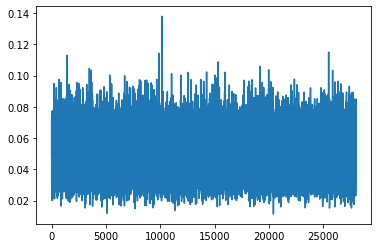

In [318]:
plt.plot(Loss)

In [321]:
model.forward(dataset.x)[-5:]

tensor([[0.4469],
        [0.4337],
        [0.4362],
        [0.4481],
        [0.4231]], grad_fn=<SliceBackward>)

In [322]:
dataset.y[-5:]

tensor([0.5145, 0.3006, 0.3815, 0.6358, 0.1647])

In [320]:
Loss[-1]

0.044541046023368835

In [312]:
data

#### Custom Model

In [404]:
x, y = load_data()

In [405]:
print(x.shape, y.shape)

torch.Size([442, 10]) torch.Size([442, 1])


In [406]:
x_train, y_train, x_test, y_test = x[:400], y[:400], x[400:], y[400:]

In [407]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([400, 10]) torch.Size([400, 1]) torch.Size([42, 10]) torch.Size([42, 1])


In [553]:
dataset = Data()

In [554]:
print(dataset.x.shape, dataset.y.shape)

torch.Size([442, 10]) torch.Size([442, 1])


In [555]:
train_dl = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

In [556]:
def forward(x):
    return x@w + b
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [557]:
# initialie the weights and bias
w = torch.randn((x.size()[1], 1), requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [559]:
model = LR(10, 1)

In [560]:
criterian = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(),  lr=0.1)

In [565]:
Loss = []
max_itr = 1000
lr = 0.01
for epoch in range(max_itr):
    
    for x, y in train_dl:
        # forward prop 
        y_pred = forward(x)

        # calculate the loss
        loss = mse(y, y_pred)

        # backpropagate  loss
        loss.backward()

        Loss.append(loss.item())
        with torch.no_grad():
            w -= lr*w.grad
            b -= lr*b.grad
            w.grad.zero_()
            b.grad.zero_()

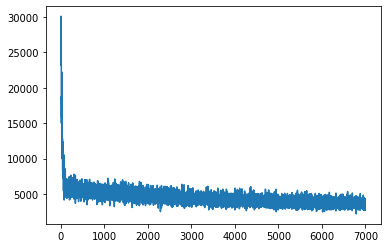

In [566]:
plt.plot(Loss)

In [567]:
Loss[0]

27344.22265625

In [568]:
Loss[-1]

3839.114990234375

In [569]:
forward(x)[:5]

tensor([[101.1208],
        [185.3590],
        [147.8818],
        [196.4622],
        [186.6077]], grad_fn=<SliceBackward>)

In [570]:
y[:5]

tensor([[ 57.],
        [279.],
        [ 85.],
        [281.],
        [197.]])

In [571]:
b

tensor([152.1304], requires_grad=True)